In [1]:
import os 
import pandas as pd
import numpy as np 
import sqlalchemy as sql 
import matplotlib.pyplot as plt 
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)


## Create engine to connect to database

In [2]:
from config import db_uri
engine = sql.create_engine(db_uri)

## Verifying sheet names in excel book

In [3]:
filename = 'data.xlsx'
book = pd.ExcelFile(filename)
book.sheet_names

['Product Sales',
 'Sheet1',
 'Employees',
 'Sales Periods',
 'Items Offered',
 'Toy_PowerBI_Example',
 'Product Price Change',
 'Product Details',
 'capstone_tables_part1',
 'capstone_table_part2']

## Create Sales by Regions

### Obtain employees table data

In [4]:
employees_df = book.parse('Employees')
employees_df

,Sales Team Lead,PayGrade,Region,EMP_ID
0,"Evans, Gina",C12,NW,EMP244
1,"Lawson, Harry",C11,NW,EMP256
2,"Bachmann, Jane",C13,NW,EMP234
3,"Clement, Beverly",C14,SW,EMP267
4,"Allen, Maude",C12,SW,EMP290


### Obtain product sales data

In [5]:
product_sales_df = book.parse('Product Sales')
product_sales_df

,Sale ID,Index,ITEM_CODE,EMP_ID,Attribute,Year,Value
0,1,2,PROD_001,EMP244,W00,2019,35
1,2,4,PROD_002,EMP244,W00,2019,41
2,3,6,PROD_003,EMP267,W00,2019,21
3,4,8,PROD_001,EMP267,W00,2019,32
4,5,10,PROD_004,EMP267,W00,2019,37
...,...,...,...,...,...,...,...
8315,8316,152,ESP_008,EMP234,W09,2020,1
8316,8317,154,ESP_008,EMP244,W09,2020,5
8317,8318,156,ESP_008,EMP256,W09,2020,0
8318,8319,158,ESP_008,EMP267,W09,2020,10


In [6]:
sales_employees_df = pd.merge(employees_df, product_sales_df, how='left', on=['EMP_ID'])
sales_employees_df['Period'] = sales_employees_df['Year'].astype(str) + ' ' + sales_employees_df['Attribute']
sales_employees_df

,Sales Team Lead,PayGrade,Region,EMP_ID,Sale ID,Index,ITEM_CODE,Attribute,Year,Value,Period
0,"Evans, Gina",C12,NW,EMP244,1,2,PROD_001,W00,2019,35,2019 W00
1,"Evans, Gina",C12,NW,EMP244,2,4,PROD_002,W00,2019,41,2019 W00
2,"Evans, Gina",C12,NW,EMP244,8,16,PROD_003,W00,2019,27,2019 W00
3,"Evans, Gina",C12,NW,EMP244,10,20,PROD_004,W00,2019,43,2019 W00
4,"Evans, Gina",C12,NW,EMP244,13,26,PROD_005,W00,2019,40,2019 W00
...,...,...,...,...,...,...,...,...,...,...,...
8315,"Allen, Maude",C12,SW,EMP290,8300,120,ESP_004,W09,2020,0,2020 W09
8316,"Allen, Maude",C12,SW,EMP290,8305,130,ESP_005,W09,2020,1,2020 W09
8317,"Allen, Maude",C12,SW,EMP290,8310,140,ESP_006,W09,2020,2,2020 W09
8318,"Allen, Maude",C12,SW,EMP290,8315,150,ESP_007,W09,2020,0,2020 W09


### Group by Regions and Graphy to Validate

In [7]:
sales_by_region = pd.DataFrame(sales_employees_df, columns = ['Region', 'Value'])
sales_by_region

,Region,Value
0,NW,35
1,NW,41
2,NW,27
3,NW,43
4,NW,40
...,...,...
8315,SW,0
8316,SW,1
8317,SW,2
8318,SW,0


In [8]:
# sales_by_region.plot.bar(title = 'Sales by Region', xlabel = 'Region', ylabel='Sales Total')

## Create sales by salesperson

### Create table with employee ID, Region and value with added column as Employee with Region assigned (to build a storyline)

In [9]:
sales_by_employee = pd.DataFrame(sales_employees_df, columns = ['EMP_ID', 'Region', 'Value'])
sales_by_employee['Employee'] = sales_employees_df['EMP_ID'] + ' ' + sales_employees_df['Region']
sales_by_employee

,EMP_ID,Region,Value,Employee
0,EMP244,NW,35,EMP244 NW
1,EMP244,NW,41,EMP244 NW
2,EMP244,NW,27,EMP244 NW
3,EMP244,NW,43,EMP244 NW
4,EMP244,NW,40,EMP244 NW
...,...,...,...,...
8315,EMP290,SW,0,EMP290 SW
8316,EMP290,SW,1,EMP290 SW
8317,EMP290,SW,2,EMP290 SW
8318,EMP290,SW,0,EMP290 SW


### Obtain the total value of sales per 'Employee' column and chart to validate

<AxesSubplot:title={'center':'Sales by Employee'}, xlabel='Employee Number', ylabel='Sales Total'>

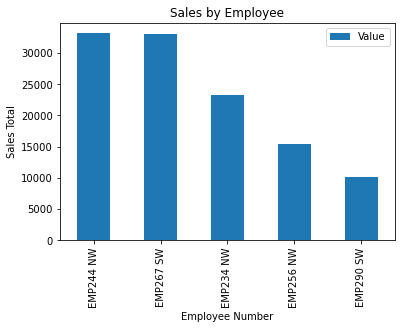

In [10]:
sales_by_employee = sales_by_employee.groupby(['Employee']).sum()
sales_by_employee
sales_by_employee.sort_values(by = 'Value', ascending = False).plot.bar(title = 'Sales by Employee', xlabel = 'Employee Number', ylabel = 'Sales Total')

## Top sales per period per salesperson

### Create Period column

In [11]:
sales_by_period_employee = sales_employees_df
# sales_by_period_employee['Period'] = sales_employees_df['Attribute'] + ' ' + sales_employees_df['Year'].astype(str)
sales_by_period_employee['Employee'] = sales_by_period_employee['EMP_ID'] + ' ' + sales_by_period_employee['Region']

sales_by_period_employee

,Sales Team Lead,PayGrade,Region,EMP_ID,Sale ID,Index,ITEM_CODE,Attribute,Year,Value,Period,Employee
0,"Evans, Gina",C12,NW,EMP244,1,2,PROD_001,W00,2019,35,2019 W00,EMP244 NW
1,"Evans, Gina",C12,NW,EMP244,2,4,PROD_002,W00,2019,41,2019 W00,EMP244 NW
2,"Evans, Gina",C12,NW,EMP244,8,16,PROD_003,W00,2019,27,2019 W00,EMP244 NW
3,"Evans, Gina",C12,NW,EMP244,10,20,PROD_004,W00,2019,43,2019 W00,EMP244 NW
4,"Evans, Gina",C12,NW,EMP244,13,26,PROD_005,W00,2019,40,2019 W00,EMP244 NW
...,...,...,...,...,...,...,...,...,...,...,...,...
8315,"Allen, Maude",C12,SW,EMP290,8300,120,ESP_004,W09,2020,0,2020 W09,EMP290 SW
8316,"Allen, Maude",C12,SW,EMP290,8305,130,ESP_005,W09,2020,1,2020 W09,EMP290 SW
8317,"Allen, Maude",C12,SW,EMP290,8310,140,ESP_006,W09,2020,2,2020 W09,EMP290 SW
8318,"Allen, Maude",C12,SW,EMP290,8315,150,ESP_007,W09,2020,0,2020 W09,EMP290 SW


### Group By Period column

In [12]:
sales_by_period_employee = pd.DataFrame(sales_by_period_employee, columns= ['Period', 'Employee', 'Value'])
emps = sales_by_period_employee.groupby(by = ['Period', 'Employee']).sum()
emps

Value
Period   Employee        
2019 W00 EMP234 NW    221
         EMP244 NW    327
         EMP256 NW    156
         EMP267 SW    274
         EMP290 SW    110
...                   ...
2020 W51 EMP234 NW    221
         EMP244 NW    274
         EMP256 NW    155
         EMP267 SW    216
         EMP290 SW    133

[520 rows x 1 columns]

### Compare if employee's value is the maximum using .transform('max')

In [13]:
emps = emps.reset_index()
emps = emps[emps['Value'] == emps.groupby('Period')['Value'].transform('max')]
emps = emps.sort_values(by = 'Period', ascending = True)
emps

,Period,Employee,Value
1,2019 W00,EMP244 NW,327
6,2019 W01,EMP244 NW,323
13,2019 W02,EMP267 SW,358
18,2019 W03,EMP267 SW,390
21,2019 W04,EMP244 NW,362
...,...,...,...
498,2020 W47,EMP267 SW,314
503,2020 W48,EMP267 SW,297
508,2020 W49,EMP267 SW,299
511,2020 W50,EMP244 NW,295


## Sales by Category of Items

### Getting Items data

In [14]:
categorized_df = product_sales_df
product_sales_df['Period'] = product_sales_df['Year'].astype(str) + ' ' + product_sales_df['Attribute']
product_sales_df['Category'] = np.where(product_sales_df['ITEM_CODE'].str[0:3] == 'ESP', 'Warranty', 'Product')
categorized_df = pd.DataFrame(product_sales_df, columns = ['Period', 'Category', 'Value'])


### Grouping Values by Category

In [15]:
categories_df = categorized_df.groupby(['Category']).sum()
categories_df

,Value
Category,
Product,99446
Warranty,15603


## Trend of Product and Warranty Sales

### Arranging table by period

In [16]:
period_df = product_sales_df
period_df

,Sale ID,Index,ITEM_CODE,EMP_ID,Attribute,Year,Value,Period,Category
0,1,2,PROD_001,EMP244,W00,2019,35,2019 W00,Product
1,2,4,PROD_002,EMP244,W00,2019,41,2019 W00,Product
2,3,6,PROD_003,EMP267,W00,2019,21,2019 W00,Product
3,4,8,PROD_001,EMP267,W00,2019,32,2019 W00,Product
4,5,10,PROD_004,EMP267,W00,2019,37,2019 W00,Product
...,...,...,...,...,...,...,...,...,...
8315,8316,152,ESP_008,EMP234,W09,2020,1,2020 W09,Warranty
8316,8317,154,ESP_008,EMP244,W09,2020,5,2020 W09,Warranty
8317,8318,156,ESP_008,EMP256,W09,2020,0,2020 W09,Warranty
8318,8319,158,ESP_008,EMP267,W09,2020,10,2020 W09,Warranty


### Arranging table with only products

In [17]:
product_df = period_df.loc[period_df['Category'] == 'Product']
product_df = pd.DataFrame(product_df, columns= ['Period', 'ITEM_CODE', 'Value'])
product_df

,Period,ITEM_CODE,Value
0,2019 W00,PROD_001,35
1,2019 W00,PROD_002,41
2,2019 W00,PROD_003,21
3,2019 W00,PROD_001,32
4,2019 W00,PROD_004,37
...,...,...,...
8275,2020 W09,PROD_008,11
8276,2020 W09,PROD_005,17
8277,2020 W09,PROD_006,16
8278,2020 W09,PROD_007,7


### Pivot product table

In [18]:
product_df = product_df.groupby(by = ['Period', 'ITEM_CODE'], as_index = False).sum()
product_pivot = product_df.pivot(index = 'Period', columns = 'ITEM_CODE', values='Value')
product_pivot

ITEM_CODE,PROD_001,PROD_002,PROD_003,PROD_004,PROD_005,PROD_006,PROD_007,PROD_008
Period,,,,,,,,
2019 W00,152,129,124,142,123,102,100,72
2019 W01,147,112,155,133,111,138,99,68
2019 W02,171,124,140,145,117,98,119,75
2019 W03,155,160,161,129,123,110,109,95
2019 W04,175,150,132,155,119,118,91,94
...,...,...,...,...,...,...,...,...
2020 W47,171,142,122,129,120,108,79,73
2020 W48,140,109,139,156,100,118,92,71
2020 W49,133,135,109,141,110,106,120,97


### Arranging table with only warranties

In [19]:
warranty_df = period_df.loc[period_df['Category'] == "Warranty"]
warranty_df

,Sale ID,Index,ITEM_CODE,EMP_ID,Attribute,Year,Value,Period,Category
40,41,81,ESP_001,EMP234,W00,2019,4,2019 W00,Warranty
41,42,83,ESP_001,EMP244,W00,2019,9,2019 W00,Warranty
42,43,85,ESP_001,EMP256,W00,2019,3,2019 W00,Warranty
43,44,87,ESP_001,EMP267,W00,2019,6,2019 W00,Warranty
44,45,89,ESP_001,EMP290,W00,2019,2,2019 W00,Warranty
...,...,...,...,...,...,...,...,...,...
8315,8316,152,ESP_008,EMP234,W09,2020,1,2020 W09,Warranty
8316,8317,154,ESP_008,EMP244,W09,2020,5,2020 W09,Warranty
8317,8318,156,ESP_008,EMP256,W09,2020,0,2020 W09,Warranty
8318,8319,158,ESP_008,EMP267,W09,2020,10,2020 W09,Warranty


### Pivot warranties

In [20]:
warranty_df = warranty_df.groupby(by = ['Period', 'ITEM_CODE'], as_index = False).sum()
warranty_pivot = warranty_df.pivot(index = 'Period', columns = 'ITEM_CODE', values='Value')
warranty_pivot

ITEM_CODE,ESP_001,ESP_002,ESP_003,ESP_004,ESP_005,ESP_006,ESP_007,ESP_008
Period,,,,,,,,
2019 W00,24,12,14,18,21,31,14,10
2019 W01,25,11,22,18,19,42,14,9
2019 W02,27,13,21,22,21,30,18,11
2019 W03,27,19,27,20,23,35,18,16
2019 W04,31,19,23,27,23,39,15,16
...,...,...,...,...,...,...,...,...
2020 W47,22,10,14,11,18,29,10,7
2020 W48,16,7,15,13,14,29,9,9
2020 W49,17,9,10,13,17,27,14,13


### Create linear graph with sample of 2 products and 2 warranties

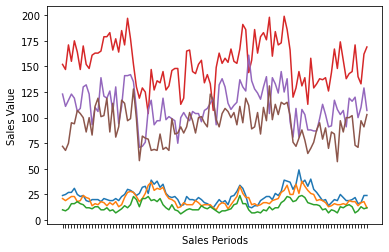

In [45]:
plt.plot(warranty_pivot['ESP_001'])
plt.plot(warranty_pivot['ESP_005'])
plt.plot(warranty_pivot['ESP_008'])
plt.plot(product_pivot['PROD_001'])
plt.plot(product_pivot['PROD_005'])
plt.plot(product_pivot['PROD_008'])

ax = plt.gca()
ax.axes.xaxis.set_ticklabels([])
plt.xlabel('Sales Periods')
plt.ylabel('Sales Value')
plt.show()

## Trends of Products and Warranties Per Region

In [22]:
# sales_employees_df
sales_of_products_warranties = pd.DataFrame(sales_employees_df, columns=['Region', 'ITEM_CODE', 'Period', 'Value', 'Category'])
sales_of_products_warranties['Category'] = np.where(sales_of_products_warranties['ITEM_CODE'].str[0:3] == 'ESP', 'Warranty', 'Product')
sales_of_products_warranties

,Region,ITEM_CODE,Period,Value,Category
0,NW,PROD_001,2019 W00,35,Product
1,NW,PROD_002,2019 W00,41,Product
2,NW,PROD_003,2019 W00,27,Product
3,NW,PROD_004,2019 W00,43,Product
4,NW,PROD_005,2019 W00,40,Product
...,...,...,...,...,...
8315,SW,ESP_004,2020 W09,0,Warranty
8316,SW,ESP_005,2020 W09,1,Warranty
8317,SW,ESP_006,2020 W09,2,Warranty
8318,SW,ESP_007,2020 W09,0,Warranty


### Northwest Sales

In [23]:
sales_NW = sales_of_products_warranties[sales_of_products_warranties['Region'] == 'NW']
sales_NW 

,Region,ITEM_CODE,Period,Value,Category
0,NW,PROD_001,2019 W00,35,Product
1,NW,PROD_002,2019 W00,41,Product
2,NW,PROD_003,2019 W00,27,Product
3,NW,PROD_004,2019 W00,43,Product
4,NW,PROD_005,2019 W00,40,Product
...,...,...,...,...,...
4987,NW,ESP_004,2020 W09,2,Warranty
4988,NW,ESP_005,2020 W09,4,Warranty
4989,NW,ESP_006,2020 W09,5,Warranty
4990,NW,ESP_007,2020 W09,2,Warranty


### NW Product Sales

In [24]:
sales_products_NW = sales_NW[sales_NW['Category'] == 'Product']
sales_products_NW

,Region,ITEM_CODE,Period,Value,Category
0,NW,PROD_001,2019 W00,35,Product
1,NW,PROD_002,2019 W00,41,Product
2,NW,PROD_003,2019 W00,27,Product
3,NW,PROD_004,2019 W00,43,Product
4,NW,PROD_005,2019 W00,40,Product
...,...,...,...,...,...
4979,NW,PROD_004,2020 W09,30,Product
4980,NW,PROD_005,2020 W09,31,Product
4981,NW,PROD_006,2020 W09,23,Product
4982,NW,PROD_007,2020 W09,18,Product


In [25]:
sales_products_NW = sales_products_NW.groupby(by = ['Period', 'ITEM_CODE'], as_index = False).sum()
sales_products_NW_pivot = sales_products_NW.pivot(index = 'Period', columns= 'ITEM_CODE', values = 'Value')
sales_products_NW_pivot

ITEM_CODE,PROD_001,PROD_002,PROD_003,PROD_004,PROD_005,PROD_006,PROD_007,PROD_008
Period,,,,,,,,
2019 W00,100,91,80,90,81,62,64,40
2019 W01,88,84,103,98,66,80,61,32
2019 W02,105,83,87,88,69,53,66,36
2019 W03,101,107,103,77,73,61,60,40
2019 W04,129,86,90,101,86,67,53,39
...,...,...,...,...,...,...,...,...
2020 W47,111,102,82,80,65,64,49,48
2020 W48,102,63,82,96,64,75,60,37
2020 W49,91,87,59,83,67,66,75,51


### NW Warranty Sales

In [26]:
sales_warranties_NW = sales_NW[sales_NW['Category'] == 'Warranty']
sales_warranties_NW

,Region,ITEM_CODE,Period,Value,Category
8,NW,ESP_001,2019 W00,9,Warranty
9,NW,ESP_002,2019 W00,6,Warranty
10,NW,ESP_003,2019 W00,3,Warranty
11,NW,ESP_004,2019 W00,6,Warranty
12,NW,ESP_005,2019 W00,9,Warranty
...,...,...,...,...,...
4987,NW,ESP_004,2020 W09,2,Warranty
4988,NW,ESP_005,2020 W09,4,Warranty
4989,NW,ESP_006,2020 W09,5,Warranty
4990,NW,ESP_007,2020 W09,2,Warranty


In [27]:
sales_warranties_NW = sales_warranties_NW.groupby(by = ['Period', 'ITEM_CODE'], as_index = False).sum()
sales_warranties_NW_pivot = sales_warranties_NW.pivot(index = 'Period', columns= 'ITEM_CODE', values = 'Value')
sales_warranties_NW_pivot

ITEM_CODE,ESP_001,ESP_002,ESP_003,ESP_004,ESP_005,ESP_006,ESP_007,ESP_008
Period,,,,,,,,
2019 W00,16,10,9,12,15,19,10,5
2019 W01,15,9,14,14,13,25,9,4
2019 W02,18,10,12,14,14,17,11,5
2019 W03,18,14,16,12,15,20,11,7
2019 W04,25,12,16,18,18,23,10,7
...,...,...,...,...,...,...,...,...
2020 W47,14,7,8,6,10,17,6,4
2020 W48,12,4,7,8,8,18,6,4
2020 W49,12,6,4,7,10,16,9,6


### Create linear graph with samples of sales of products and warranties

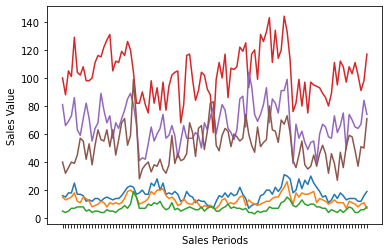

In [46]:
plt.plot(sales_warranties_NW_pivot['ESP_001'])
plt.plot(sales_warranties_NW_pivot['ESP_005'])
plt.plot(sales_warranties_NW_pivot['ESP_008'])
plt.plot(sales_products_NW_pivot['PROD_001'])
plt.plot(sales_products_NW_pivot['PROD_005'])
plt.plot(sales_products_NW_pivot['PROD_008'])

ax = plt.gca()
ax.axes.xaxis.set_ticklabels([])
plt.xlabel('Sales Periods')
plt.ylabel('Sales Value')
plt.show()

### Southwest Product Sales

In [29]:
sales_SW = sales_of_products_warranties[sales_of_products_warranties['Region'] == 'SW']
sales_SW 

,Region,ITEM_CODE,Period,Value,Category
4992,SW,PROD_003,2019 W00,21,Product
4993,SW,PROD_001,2019 W00,32,Product
4994,SW,PROD_004,2019 W00,37,Product
4995,SW,PROD_002,2019 W00,31,Product
4996,SW,PROD_005,2019 W00,32,Product
...,...,...,...,...,...
8315,SW,ESP_004,2020 W09,0,Warranty
8316,SW,ESP_005,2020 W09,1,Warranty
8317,SW,ESP_006,2020 W09,2,Warranty
8318,SW,ESP_007,2020 W09,0,Warranty


### Southwest Product Sales

In [30]:
sales_products_SW = sales_SW[sales_SW['Category'] == 'Product']
sales_products_SW

,Region,ITEM_CODE,Period,Value,Category
4992,SW,PROD_003,2019 W00,21,Product
4993,SW,PROD_001,2019 W00,32,Product
4994,SW,PROD_004,2019 W00,37,Product
4995,SW,PROD_002,2019 W00,31,Product
4996,SW,PROD_005,2019 W00,32,Product
...,...,...,...,...,...
8307,SW,PROD_004,2020 W09,12,Product
8308,SW,PROD_005,2020 W09,17,Product
8309,SW,PROD_006,2020 W09,16,Product
8310,SW,PROD_007,2020 W09,7,Product


In [31]:
sales_products_SW = sales_products_SW.groupby(by = ['Period', 'ITEM_CODE'], as_index = False).sum()
sales_products_SW_pivot = sales_products_SW.pivot(index = 'Period', columns= 'ITEM_CODE', values = 'Value')
sales_products_SW_pivot

ITEM_CODE,PROD_001,PROD_002,PROD_003,PROD_004,PROD_005,PROD_006,PROD_007,PROD_008
Period,,,,,,,,
2019 W00,52,38,44,52,42,40,36,32
2019 W01,59,28,52,35,45,58,38,36
2019 W02,66,41,53,57,48,45,53,39
2019 W03,54,53,58,52,50,49,49,55
2019 W04,46,64,42,54,33,51,38,55
...,...,...,...,...,...,...,...,...
2020 W47,60,40,40,49,55,44,30,25
2020 W48,38,46,57,60,36,43,32,34
2020 W49,42,48,50,58,43,40,45,46


### Southwest Warranty Sales

In [32]:
sales_warranties_SW = sales_SW[sales_SW['Category'] == 'Warranty']
sales_warranties_SW

,Region,ITEM_CODE,Period,Value,Category
5000,SW,ESP_001,2019 W00,6,Warranty
5001,SW,ESP_002,2019 W00,2,Warranty
5002,SW,ESP_003,2019 W00,4,Warranty
5003,SW,ESP_004,2019 W00,4,Warranty
5004,SW,ESP_005,2019 W00,5,Warranty
...,...,...,...,...,...
8315,SW,ESP_004,2020 W09,0,Warranty
8316,SW,ESP_005,2020 W09,1,Warranty
8317,SW,ESP_006,2020 W09,2,Warranty
8318,SW,ESP_007,2020 W09,0,Warranty


In [33]:
sales_warranties_SW = sales_warranties_SW.groupby(by = ['Period', 'ITEM_CODE'], as_index = False).sum()
sales_warranties_SW_pivot = sales_warranties_SW.pivot(index = 'Period', columns= 'ITEM_CODE', values = 'Value')
sales_warranties_SW_pivot

ITEM_CODE,ESP_001,ESP_002,ESP_003,ESP_004,ESP_005,ESP_006,ESP_007,ESP_008
Period,,,,,,,,
2019 W00,8,2,5,6,6,12,4,5
2019 W01,10,2,8,4,6,17,5,5
2019 W02,9,3,9,8,7,13,7,6
2019 W03,9,5,11,8,8,15,7,9
2019 W04,6,7,7,9,5,16,5,9
...,...,...,...,...,...,...,...,...
2020 W47,8,3,6,5,8,12,4,3
2020 W48,4,3,8,5,6,11,3,5
2020 W49,5,3,6,6,7,11,5,7


### Create linear graph with samples of sales of products and warranties

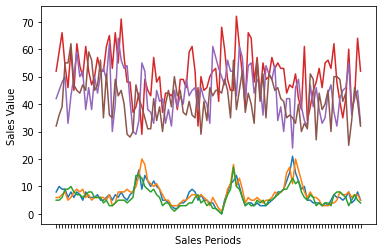

In [47]:
plt.plot(sales_warranties_SW_pivot['ESP_001'])
plt.plot(sales_warranties_SW_pivot['ESP_005'])
plt.plot(sales_warranties_SW_pivot['ESP_008'])
plt.plot(sales_products_SW_pivot['PROD_001'])
plt.plot(sales_products_SW_pivot['PROD_005'])
plt.plot(sales_products_SW_pivot['PROD_008'])

ax = plt.gca()
ax.axes.xaxis.set_ticklabels([])
plt.xlabel('Sales Periods')
plt.ylabel('Sales Value')
plt.show()

## Total Sales of Products and Warranties by Region

In [35]:
total_sales_by_region = pd.DataFrame(sales_employees_df, columns=['Region', 'ITEM_CODE', 'Period', 'Value'])
total_sales_by_region['Category'] = np.where(sales_of_products_warranties['ITEM_CODE'].str[0:3] == 'ESP', 'Warranty', 'Product')
total_sales_by_region

,Region,ITEM_CODE,Period,Value,Category
0,NW,PROD_001,2019 W00,35,Product
1,NW,PROD_002,2019 W00,41,Product
2,NW,PROD_003,2019 W00,27,Product
3,NW,PROD_004,2019 W00,43,Product
4,NW,PROD_005,2019 W00,40,Product
...,...,...,...,...,...
8315,SW,ESP_004,2020 W09,0,Warranty
8316,SW,ESP_005,2020 W09,1,Warranty
8317,SW,ESP_006,2020 W09,2,Warranty
8318,SW,ESP_007,2020 W09,0,Warranty


## Total Sales of Products by Region

### Northwest

In [36]:
total_sales_by_region_products_NW = total_sales_by_region.loc[(total_sales_by_region['Region'] == 'NW') & (total_sales_by_region['Category'] == 'Product')]
total_sales_by_region_products_NW

,Region,ITEM_CODE,Period,Value,Category
0,NW,PROD_001,2019 W00,35,Product
1,NW,PROD_002,2019 W00,41,Product
2,NW,PROD_003,2019 W00,27,Product
3,NW,PROD_004,2019 W00,43,Product
4,NW,PROD_005,2019 W00,40,Product
...,...,...,...,...,...
4979,NW,PROD_004,2020 W09,30,Product
4980,NW,PROD_005,2020 W09,31,Product
4981,NW,PROD_006,2020 W09,23,Product
4982,NW,PROD_007,2020 W09,18,Product


In [37]:
total_sales_by_region_products_NW = total_sales_by_region_products_NW.groupby(by = ['Period', 'ITEM_CODE'], as_index = False).sum()
total_sales_by_region_products_NW_pivot = total_sales_by_region_products_NW.pivot_table(index = 'Period', columns= 'ITEM_CODE', values = 'Value', aggfunc=np.sum, margins=True, margins_name = 'TOTAL')
total_sales_by_region_products_NW_pivot

ITEM_CODE,PROD_001,PROD_002,PROD_003,PROD_004,PROD_005,PROD_006,PROD_007,PROD_008,TOTAL
Period,,,,,,,,,
2019 W00,100,91,80,90,81,62,64,40,608
2019 W01,88,84,103,98,66,80,61,32,612
2019 W02,105,83,87,88,69,53,66,36,587
2019 W03,101,107,103,77,73,61,60,40,622
2019 W04,129,86,90,101,86,67,53,39,651
...,...,...,...,...,...,...,...,...,...
2020 W48,102,63,82,96,64,75,60,37,579
2020 W49,91,87,59,83,67,66,75,51,579
2020 W50,98,75,64,78,84,61,56,50,566


In [38]:
total_sales_by_region_warranties_NW = total_sales_by_region.loc[(total_sales_by_region['Region'] == 'NW') & (total_sales_by_region['Category'] == 'Warranty')]
total_sales_by_region_warranties_NW

,Region,ITEM_CODE,Period,Value,Category
8,NW,ESP_001,2019 W00,9,Warranty
9,NW,ESP_002,2019 W00,6,Warranty
10,NW,ESP_003,2019 W00,3,Warranty
11,NW,ESP_004,2019 W00,6,Warranty
12,NW,ESP_005,2019 W00,9,Warranty
...,...,...,...,...,...
4987,NW,ESP_004,2020 W09,2,Warranty
4988,NW,ESP_005,2020 W09,4,Warranty
4989,NW,ESP_006,2020 W09,5,Warranty
4990,NW,ESP_007,2020 W09,2,Warranty


In [39]:
total_sales_by_region_warranties_NW = total_sales_by_region_warranties_NW.groupby(by = ['Period', 'ITEM_CODE'], as_index = False).sum()
total_sales_by_region_warranties_NW_pivot = total_sales_by_region_warranties_NW.pivot_table(index = 'Period', columns= 'ITEM_CODE', values = 'Value', aggfunc=np.sum, margins=True, margins_name = 'TOTAL')
total_sales_by_region_warranties_NW_pivot

ITEM_CODE,ESP_001,ESP_002,ESP_003,ESP_004,ESP_005,ESP_006,ESP_007,ESP_008,TOTAL
Period,,,,,,,,,
2019 W00,16,10,9,12,15,19,10,5,96
2019 W01,15,9,14,14,13,25,9,4,103
2019 W02,18,10,12,14,14,17,11,5,101
2019 W03,18,14,16,12,15,20,11,7,113
2019 W04,25,12,16,18,18,23,10,7,129
...,...,...,...,...,...,...,...,...,...
2020 W48,12,4,7,8,8,18,6,4,67
2020 W49,12,6,4,7,10,16,9,6,70
2020 W50,16,5,5,7,11,15,5,6,70


### Southwest

In [40]:
total_sales_by_region_products_SW = total_sales_by_region.loc[(total_sales_by_region['Region'] == 'SW') & (total_sales_by_region['Category'] == 'Product')]
total_sales_by_region_products_SW

,Region,ITEM_CODE,Period,Value,Category
4992,SW,PROD_003,2019 W00,21,Product
4993,SW,PROD_001,2019 W00,32,Product
4994,SW,PROD_004,2019 W00,37,Product
4995,SW,PROD_002,2019 W00,31,Product
4996,SW,PROD_005,2019 W00,32,Product
...,...,...,...,...,...
8307,SW,PROD_004,2020 W09,12,Product
8308,SW,PROD_005,2020 W09,17,Product
8309,SW,PROD_006,2020 W09,16,Product
8310,SW,PROD_007,2020 W09,7,Product


In [41]:
total_sales_by_region_products_SW = total_sales_by_region_products_SW.groupby(by = ['Period', 'ITEM_CODE'], as_index = False).sum()
total_sales_by_region_products_SW_pivot = total_sales_by_region_products_SW.pivot_table(index = 'Period', columns= 'ITEM_CODE', values = 'Value', aggfunc=np.sum, margins=True, margins_name='TOTAL')
total_sales_by_region_products_SW_pivot

ITEM_CODE,PROD_001,PROD_002,PROD_003,PROD_004,PROD_005,PROD_006,PROD_007,PROD_008,TOTAL
Period,,,,,,,,,
2019 W00,52,38,44,52,42,40,36,32,336
2019 W01,59,28,52,35,45,58,38,36,351
2019 W02,66,41,53,57,48,45,53,39,402
2019 W03,54,53,58,52,50,49,49,55,420
2019 W04,46,64,42,54,33,51,38,55,383
...,...,...,...,...,...,...,...,...,...
2020 W48,38,46,57,60,36,43,32,34,346
2020 W49,42,48,50,58,43,40,45,46,372
2020 W50,64,46,42,52,45,36,33,41,359


In [42]:
total_sales_by_region_warranties_SW = total_sales_by_region.loc[(total_sales_by_region['Region'] == 'SW') & (total_sales_by_region['Category'] == 'Warranty')]
total_sales_by_region_warranties_SW

,Region,ITEM_CODE,Period,Value,Category
5000,SW,ESP_001,2019 W00,6,Warranty
5001,SW,ESP_002,2019 W00,2,Warranty
5002,SW,ESP_003,2019 W00,4,Warranty
5003,SW,ESP_004,2019 W00,4,Warranty
5004,SW,ESP_005,2019 W00,5,Warranty
...,...,...,...,...,...
8315,SW,ESP_004,2020 W09,0,Warranty
8316,SW,ESP_005,2020 W09,1,Warranty
8317,SW,ESP_006,2020 W09,2,Warranty
8318,SW,ESP_007,2020 W09,0,Warranty


In [43]:
total_sales_by_region_warranties_SW = total_sales_by_region_warranties_SW.groupby(by = ['Period', 'ITEM_CODE'], as_index = False).sum()
# total_sales_by_region_warranties_SW 
total_sales_by_region_warranties_SW_pivot = total_sales_by_region_warranties_SW.pivot_table(index = 'Period', columns= 'ITEM_CODE', values = 'Value', aggfunc=np.sum, margins=True, margins_name='TOTAL')
total_sales_by_region_warranties_SW_pivot

ITEM_CODE,ESP_001,ESP_002,ESP_003,ESP_004,ESP_005,ESP_006,ESP_007,ESP_008,TOTAL
Period,,,,,,,,,
2019 W00,8,2,5,6,6,12,4,5,48
2019 W01,10,2,8,4,6,17,5,5,57
2019 W02,9,3,9,8,7,13,7,6,62
2019 W03,9,5,11,8,8,15,7,9,72
2019 W04,6,7,7,9,5,16,5,9,64
...,...,...,...,...,...,...,...,...,...
2020 W48,4,3,8,5,6,11,3,5,45
2020 W49,5,3,6,6,7,11,5,7,50
2020 W50,8,3,5,6,7,9,4,5,47


### Linear graph with total sales of products and warranties by regions

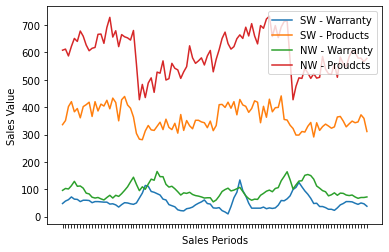

In [44]:
a = total_sales_by_region_warranties_SW_pivot['TOTAL'].drop('TOTAL', 0)
b = total_sales_by_region_products_SW_pivot['TOTAL'].drop('TOTAL', 0)
x = total_sales_by_region_warranties_NW_pivot['TOTAL'].drop('TOTAL', 0)
y = total_sales_by_region_products_NW_pivot['TOTAL'].drop('TOTAL', 0)

plt.plot(a)
plt.plot(b)
plt.plot(x)
plt.plot(y)

ax = plt.gca()
ax.legend(['SW - Warranty', 'SW - Products', 'NW - Warranty', 'NW - Proudcts'])
ax.axes.xaxis.set_ticklabels([])
plt.xlabel('Sales Periods')
plt.ylabel('Sales Value')
plt.show()